## Aufgabe 1


#### Herleitung der Formel für den Variational Loss Term:
$$    D_{KL}(q(y|x) \| \mathcal{N}(0, 1)) = \frac{1}{2} \left( \sigma_x^2 + \mu_x^2 - 1 - \log \sigma_x^2 \right) $$






Die KL-Divergenz misst die Distanz zwischen der approximierten Verteilung 
$$ q(y|x) = \mathcal{N}(\mu_x, \sigma_x^2) $$ 

und der prior-Verteilung 

$$ p(y) = \mathcal{N}(0, 1) $$.

Die KL-Divergenz ist definiert als:
$$ D_{KL}(q(y|x) \| p(y)) = \int q(y|x) \log \frac{q(y|x)}{p(y)} \, dy $$

Einsetzen der Normalverteilungen:
$$
q(y|x) = \frac{1}{\sqrt{2\pi\sigma_x^2}} \exp\left(-\frac{(y-\mu_x)^2}{2\sigma_x^2}\right), \quad
p(y) = \frac{1}{\sqrt{2\pi}} \exp\left(-\frac{y^2}{2}\right)
$$

Die KL-Divergenz wird:
$$
D_{KL} = \int_{-\infty}^\infty \frac{1}{\sqrt{2\pi\sigma_x^2}} \exp\left(-\frac{(y-\mu_x)^2}{2\sigma_x^2}\right) \log \frac{\frac{1}{\sqrt{2\pi\sigma_x^2}} \exp\left(-\frac{(y-\mu_x)^2}{2\sigma_x^2}\right)}{\frac{1}{\sqrt{2\pi}} \exp\left(-\frac{y^2}{2}\right)} \, dy
$$

#### Schritte:
1. **Logarithmus aufteilen**:
   $$
   \log \frac{q(y|x)}{p(y)} = \log \frac{1}{\sqrt{2\pi\sigma_x^2}} - \frac{(y-\mu_x)^2}{2\sigma_x^2} - \left(-\frac{y^2}{2}\right) + \log \sqrt{2\pi}
   $$

2. **Integration der Terme**:
   - Verwenden der Eigenschaften der Normalverteilung:
     - $$\int_{-\infty}^\infty q(y|x) (y - \mu_x)^2 \, dy = \sigma_x^2$$
     - $$\int_{-\infty}^\infty q(y|x) y^2 \, dy = \sigma_x^2 + \mu_x^2$$

   Nach Vereinfachung ergibt sich die finale Formel:
   $$
   D_{KL} = \frac{1}{2} \left( \sigma_x^2 + \mu_x^2 - 1 - \log \sigma_x^2 \right)
   $$



#### Interpretation des Effekts dieses Terms auf die Verteilung der latenten Variablen $ \mu_x $ des Encoders.


Der KL-Divergenz-Term in der Loss-Funktion hat zwei Hauptwirkungen: Er reguliert die latenten Variablen, indem er $ \mu_x $ und $ \sigma_x^2 $ dazu zwingt, der prior-Verteilung $ \mathcal{N}(0, 1) $ ähnlich zu sein, wobei $ \mu_x $ in Richtung 0 gezogen wird, um zu verhindern, dass die latenten Variablen zu stark vom prior abweichen. Gleichzeitig kontrolliert der Term die Varianz, indem $ \sigma_x^2 $ dazu gedrängt wird, Werte nahe 1 anzunehmen, um eine gleichmäßige und gut strukturierte Verteilung im latenten Raum sicherzustellen. Diese Regularisierung führt zu einem glatteren und kontinuierlicheren latenten Raum, was die Generalisierungsfähigkeit des Modells verbessert.

## Aufgabe 2: The Variational Autoencoder as a Two-Player Game 

Ein Autoencoder kann als ein **Zwei-Spieler-Spiel** zwischen einem Encoder (Alice) und einem Decoder (Bob) interpretiert werden. In dieser Analogie erhält Alice Daten (z. B. ein Bild), die sie in eine komprimierte bzw. kodierte Darstellung umwandelt, welche sie an Bob weiterleitet. Bob nutzt diesen Code, um die ursprünglichen Daten zu rekonstruieren. Beide arbeiten zusammen, um die Differenz zwischen der Original- und der rekonstruierten Version zu minimieren, wobei ein Kritiker (Charlie) die Qualität der Rekonstruktion bewertet und Feedback gibt.

Im Fall eines **Denoising Autoencoders** erhält Alice als Eingabe eine noisy Version der Daten. Ihre Aufgabe ist es, dennoch einen Code zu generieren, der die relevanten Informationen des ursprünglichen, sauberen Inputs enthält. Bob verwendet diesen Code, um die Daten so gut wie möglich zu rekonstruieren, wobei er die saubere Version als Ziel hat. Das Ziel von Alice und Bob ist nicht nur die Rekonstruktion des Inputs, sondern auch die Fähigkeit, robuste Codes zu erzeugen, die trotz Rauschen nützliche Informationen bewahren.

Ein Denoising Autoencoder könnte auch als **Drei-Spieler-Spiel** interpretiert werden, wobei **Alice (Encoder)** einen Code aus der verrauschten Eingabe erstellt und Strategien entwickelt, um Rauschen zu ignorieren. **Bob (Decoder)** verwendet diesen Code, um die ursprünglichen, sauberen Daten zu rekonstruieren. **Charlie (Kritiker)** bewertet wie gut Bob die saubere Version rekonstruiert und liefert Feedback, das sowohl Alice als auch Bob nutzen können, um ihre Strategien zu verbessern.

## Aufgabe 3: Word2Vec-Modells

In [9]:
import gensim.downloader as api
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [4]:
# Laden des text8-Datensatzes
corpus = api.load('text8')

# Trainieren des Word2Vec-Modells
model = Word2Vec(sentences=corpus, vector_size=100, window=5, min_count=5, workers=4)


[==================================================] 100.0% 31.6/31.6MB downloaded


In [7]:
# Liste der 10 häufigsten Wörter
frequent_words = model.wv.index_to_key[:10]
print("Häufigste 10 Wörter:", frequent_words)


Häufigste 10 Wörter: ['the', 'of', 'and', 'one', 'in', 'a', 'to', 'zero', 'nine', 'two']


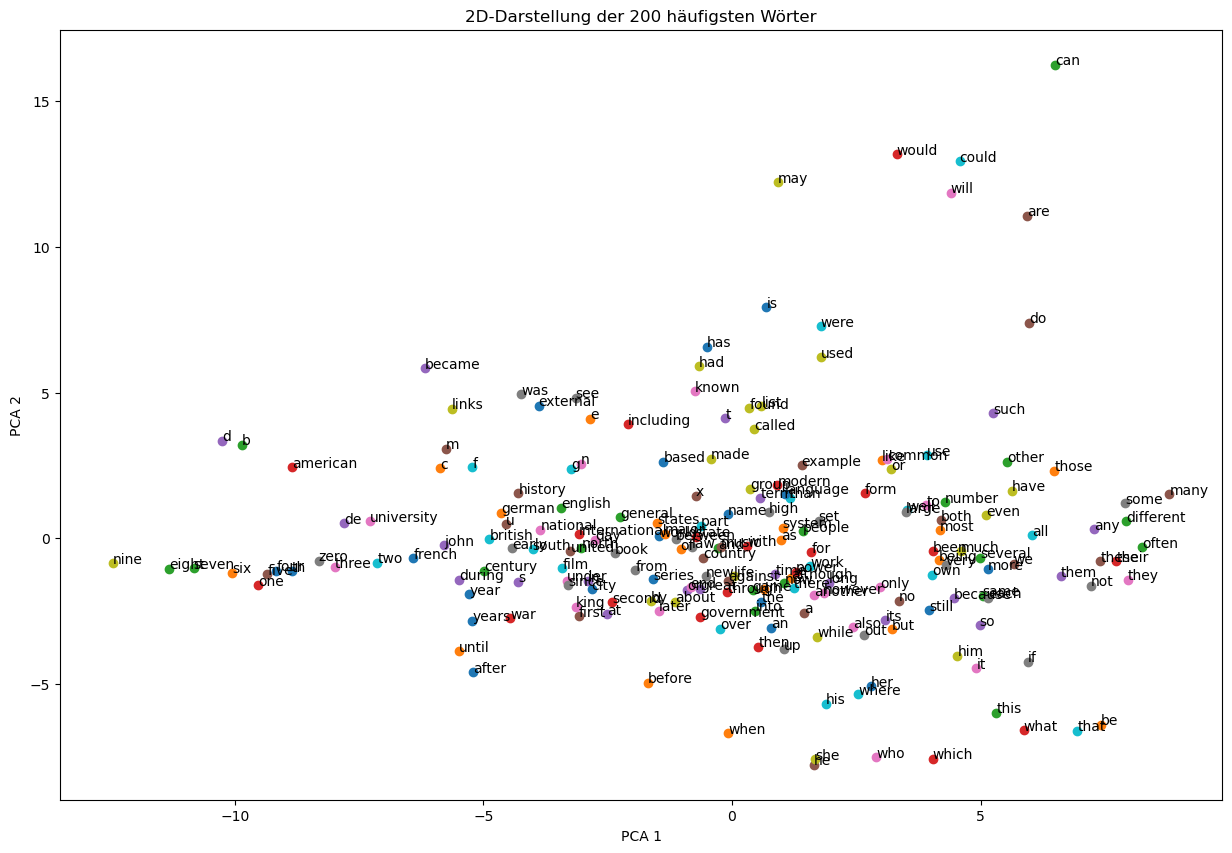

In [10]:
# Auswahl der 200 häufigsten Wörter
words = model.wv.index_to_key[:200]
word_vectors = [model.wv[word] for word in words]

# PCA für die Dimensionenreduktion
pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(word_vectors)

# Plotten der Wörter
plt.figure(figsize=(15, 10))
for i, word in enumerate(words):
    plt.scatter(word_vectors_2d[i, 0], word_vectors_2d[i, 1])
    plt.annotate(word, (word_vectors_2d[i, 0], word_vectors_2d[i, 1]))

plt.title("2D-Darstellung der 200 häufigsten Wörter")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

Clusterbildung: Wörter mit ähnlichem Kontext scheinen sich in Gruppen zu sammeln. Beispielsweise könnten Zahlen wie "one", "two", "three" oder geografische Bezeichnungen wie "german", "english", "french" in Clustern zusammenliegen.

Semantische Beziehungen: Wörter, die ähnliche Bedeutungen oder Verwendungszwecke haben, befinden sich näher zueinander. Das deutet darauf hin, dass das Word2Vec-Modell erfolgreich kontextuelle Ähnlichkeiten gelernt hat.

